## Classification

The density of pollutants in open pit mining vs time is typically considered as flow time series data. Flow time series data represents the rate or flow of a variable over a specific time period. In this case, it refers to the measurement of pollutant density or concentration at different points in time, indicating the change or movement of pollutants over time.

The density of pollutants can vary over different time intervals, such as hourly, daily, monthly, etc. By observing the changes in pollutant density over time, trends, patterns, and seasonality in the pollutant levels can be identified. Flow time series data is commonly analyzed using various time series analysis techniques to understand the dynamics and behavior of the variable over time.

## Curve Fitting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.express as px
from scipy.optimize import curve_fit
import math
%matplotlib inline

In [6]:
data = pd.read_csv(r"C:\Users\HP\Downloads\ee798q_ass\Interpolated Df.csv", index_col = 0, header = 0)
df = pd.DataFrame(data)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d %H:%M:%S')
df

,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),OZONE (µg/m3),BENZENE (µg/m3)
From,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,18.1,90.1,56.2,0.310000,8.2,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,18.1,88.0,55.1,0.330000,8.2,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,18.1,87.7,55.2,0.380000,8.2,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,18.1,88.9,55.7,0.380000,8.2,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,18.1,90.0,55.8,0.380000,8.2,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...
2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,0.630000,10.0,10.7,26.1,0.1
2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,0.570000,10.0,10.4,30.9,0.1
2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,0.580000,9.9,10.5,29.6,0.1


<IPython.core.display.Javascript object>


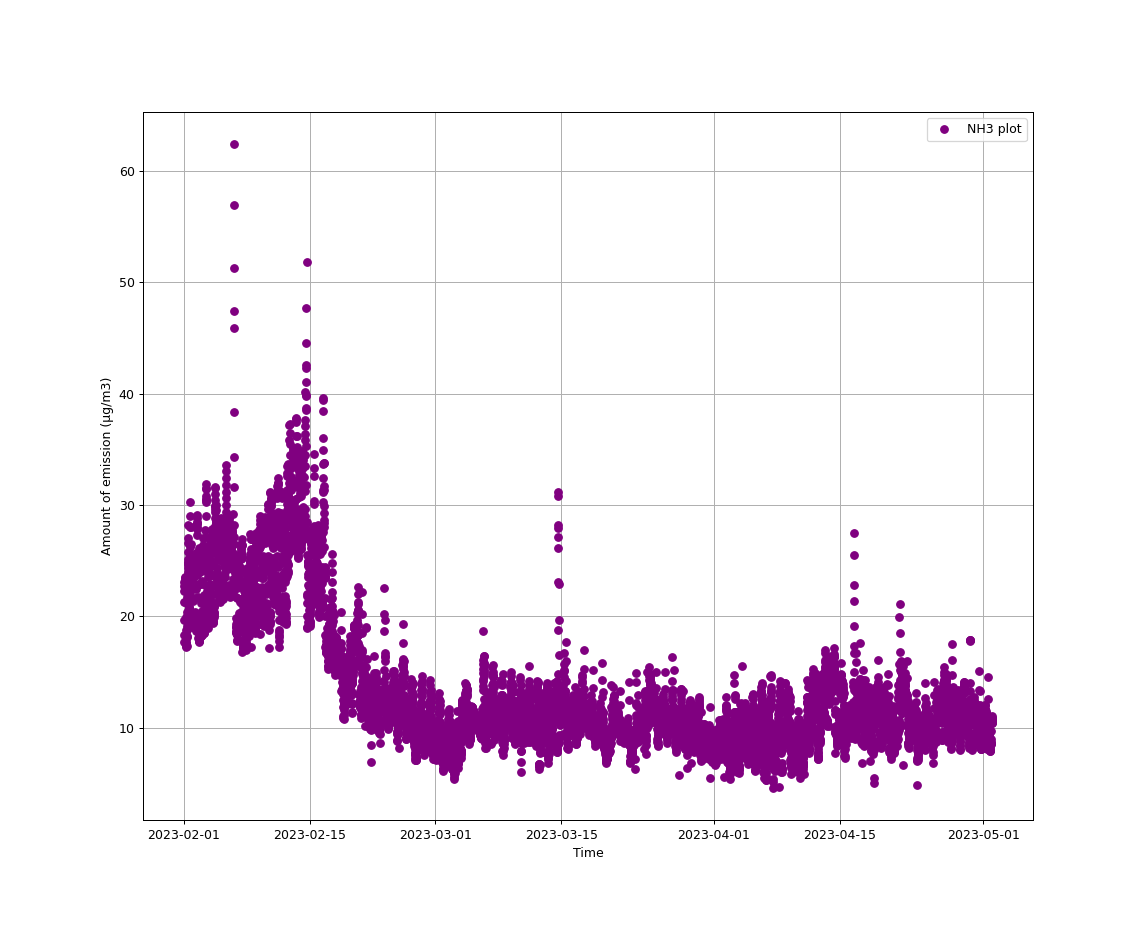

In [9]:
%matplotlib notebook
plt.plot( df.index, df['NH3 (µg/m3)'],'o', label = 'NH3 plot', color = 'purple')
plt.xlabel('Time')
plt.ylabel('Amount of emission (µg/m3)')
plt.grid()
plt.legend()

We try to guess a function with a similar shape and provide intial guesses:

In [63]:
x = np.arange(1, 8641)

In [64]:
def model_func(x, a, b, c , d):
    return a * (-(1/2) * np.sqrt(1 - (np.abs(b * (x - c)) - 1)**2) + 1) + d

In [65]:
popt, pcov = curve_fit(model_func, x, df['NH3 (µg/m3)'], p0=[0.076, 0.000011, 1937, -53.595])

C:\Users\HP\AppData\Local\Temp\ipykernel_8244\2714269517.py:2: RuntimeWarning:

invalid value encountered in sqrt



In [66]:
popt

array([ 4.30934030e+01,  1.91470525e-04,  5.33000000e+02, -1.23740088e+01])

In [74]:
y = model_func(x, popt[0], popt[1], popt[2]+350, popt[3])
# y = model_func(x, 76.083, 0.000011, 1337.398, 33.595)
# y = y-85

<IPython.core.display.Javascript object>


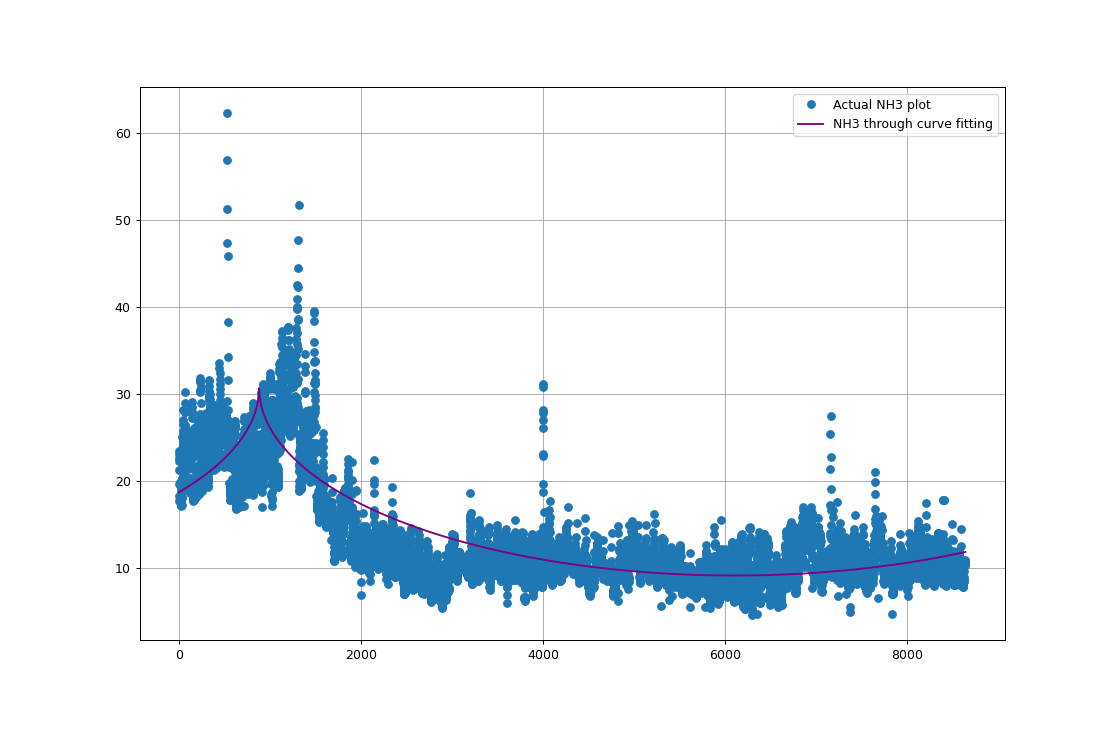

In [71]:
%matplotlib notebook
plt.plot( x, df['NH3 (µg/m3)'],'o', label = 'Actual NH3 plot')
plt.plot( x, y, label = 'NH3 through curve fitting', color = 'purple')

plt.grid()
plt.legend()

Therefore, the curve 4.30934030e+01* (-(1/2)* np.sqrt(1-(np.abs(1.91470525e-04* (x - 883))-1)** 2) + 1) + -1.23740088e+01 best fits the NH3 data.

In [75]:
actual = df['NH3 (µg/m3)']
predicted = y
ape = np.abs((actual - predicted) / actual)
mape = np.mean(ape) * 100
    
mape

20.829546162597737

Though, the mean absolute percentage error is very high.